1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as display

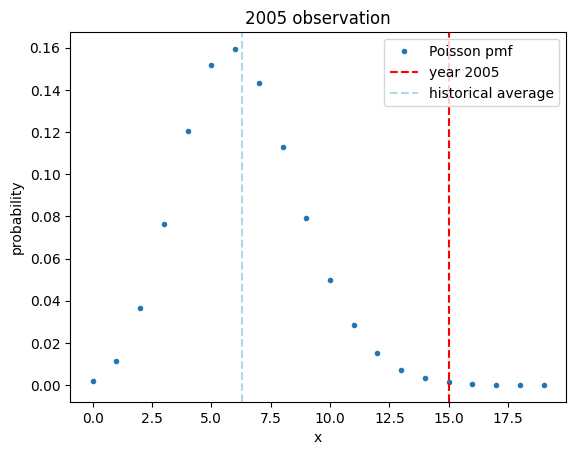

Z score: 3.4662


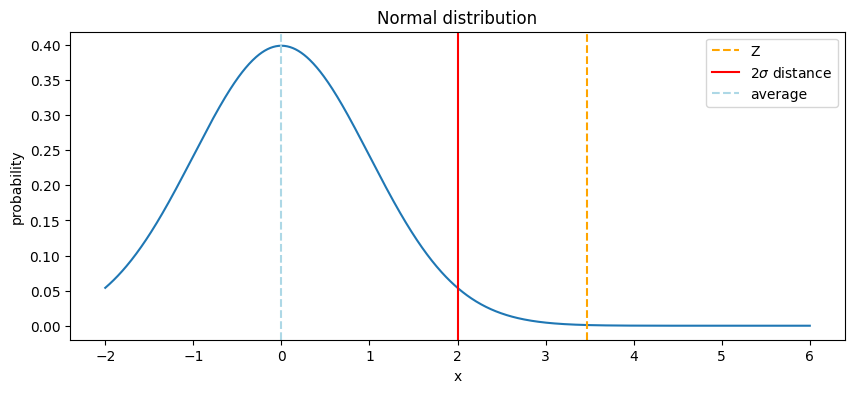

since the value for Z is well outside of the confidence interval, we can confirm
that the hypothesis of 2005 being significantly higher in hurricanes count holds.


In [29]:
# we need to compare the averages using the Z test
# null hypothesis
mu = 6.3
var = 6.3
std = np.sqrt(var)

# 2005 observation of 15 hurricanes
x0 = 15

x = np.arange(0, 20)

# poisson distribution data for y-axis
y = sp.stats.poisson.pmf(x, mu=mu)
# plotting the graph
plt.plot(x, y, marker='.', linestyle='none', label="Poisson pmf")
plt.axvline(x0, linestyle='--', color='red', label="year 2005")
plt.axvline(mu, linestyle='--', color='lightblue', label="historical average")
plt.legend()
plt.title("2005 observation")
plt.ylabel("probability")
plt.xlabel("x")
plt.show()

# determine the Z score
Z = abs(x0 - mu) / std
print("Z score: %.4f" %Z)

fig, ax = plt.subplots(figsize=(10, 4))
x = np.linspace(-2, 6, 1000)
y = sp.stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y)
plt.axvline(Z, linestyle='--', color='orange', label="Z")
plt.axvline(2, linestyle='-', color='red', label="$2\sigma$ distance")
plt.axvline(0, linestyle='--', color='lightblue', label="average")
plt.title("Normal distribution")
plt.ylabel("probability")
plt.xlabel("x")
plt.legend()
plt.show()
print("since the value for Z is well outside of the confidence interval, we can confirm")
print("that the hypothesis of 2005 being significantly higher in hurricanes count holds.")


In [28]:
pvalue = 1-sp.stats.norm.cdf(Z)
print("p-value: %.5f" %pvalue)

p-value: 0.00026


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [24]:
# importing the data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# calculate the test statistics T
muPre = np.mean(pre)
muPost = np.mean(post)
varPre = np.var(pre, ddof=1)
varPost = np.var(post, ddof=1)
sigma = np.sqrt((varPre+varPost)/2)
T = (muPre-muPost)/(sigma*np.sqrt(2/len(pre)))

print("T score: %.3f" %T)

T score: -3.787


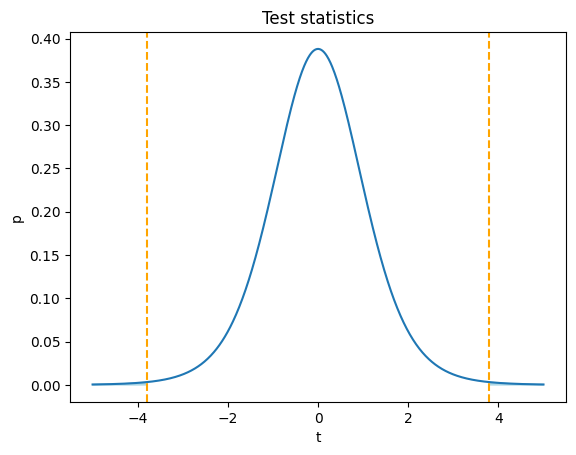

p-value = 0.004302464132864604
we are not provided with a value for alpha, but if we consider a typical threshold
of alpha=0.05, we reject the null hypothesis: the treatment was not significant.


In [27]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = sp.stats.t.pdf(xs, len(pre) - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='orange')
plt.title("Test statistics")
plt.ylabel("p")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = sp.stats.t.cdf(T, len(pre) - 1) + (1. - sp.stats.t.cdf(-T, len(pre) - 1))
print("p-value =", pvalue)
print("we are not provided with a value for alpha, but if we consider a typical threshold")
print("of alpha=0.05, we reject the null hypothesis: the treatment was not significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.